In [27]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages")
import re
import pandas as pd
import tweepy
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Cliques

## Get Network

In [41]:
# Get Data
network_data = pd.read_csv('network.csv')

# Create Network
G = nx.from_pandas_edgelist(network_data, 'Source', 'Target', edge_attr='Content_Type')

## Get Largest Clique In Network

In [42]:
# Source1: https://s3.amazonaws.com/assets.datacamp.com/production/course_3286/slides/ch3_slides.pdf
# Source2: https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
import operator

# Get Cliques In Network
cliques = list(nx.find_cliques(G))

# Get Clique Sizes
lengths = {}
for i in range(len(cliques)):
    lengths[i] = len(cliques[i])

# Get Largest Clique
max_length = max(lengths.items(), key=operator.itemgetter(1))[0]
print('Max Length of Clique:', lengths[max_length])

# Get Largest Cliques
largest_cliques = []
for clique in cliques:
    if len(clique) == lengths[max_length]:
        largest_cliques.append(clique)

largest_cliques
        

Max Length of Clique: 5


[['@VotesToCongress',
  '@StayingReal0511',
  '@itsmeKNR',
  '@EbrahimNasreen',
  '@shubhshaurya1'],
 ['@VotesToCongress',
  '@StayingReal0511',
  '@itsmeKNR',
  '@EbrahimNasreen',
  '@rahulkanwal'],
 ['@t_d_h_nair',
  '@EbrahimNasreen',
  '@faisalspeaker',
  '@iamharmeetK',
  '@HarisButt_says'],
 ['@t_d_h_nair',
  '@EbrahimNasreen',
  '@faisalspeaker',
  '@iamharmeetK',
  '@Aslam_khader'],
 ['@tjose66', '@nandtara', '@RavindraGautam_', '@rkhuria2', '@jayatalkshow'],
 ['@NishantRaval',
  '@gopalkagarwal',
  '@muthumagesh10',
  '@sumitragoenka',
  '@TheFederal_News'],
 ['@Vinita_Jain7',
  '@StayingReal0511',
  '@EbrahimNasreen',
  '@itsmeKNR',
  '@shubhshaurya1'],
 ['@Vinita_Jain7',
  '@StayingReal0511',
  '@EbrahimNasreen',
  '@itsmeKNR',
  '@rahulkanwal'],
 ['@g', '@_Deep_KSandhu', '@planet_lunatic', '@guramneet', '@CheemaTakhar'],
 ['@jayatalkshow', '@RavindraGautam_', '@nandtara', '@rkhuria2', '@rkhuria'],
 ['@jayatalkshow', '@RavindraGautam_', '@nandtara', '@rkhuria2', '@V_with_RG'

In [43]:
# Get number of large cliques each user belongs to
clique_users = {}
for clique in largest_cliques:
    for person in clique:
        if person not in clique_users:
            clique_users[person] = 1
        else:
            clique_users[person] += 1
clique_users = pd.Series(clique_users)

clique_users.sort_values(ascending=False)

@EbrahimNasreen     16
@StayingReal0511    12
@itsmeKNR           10
@shubhshaurya1       6
@rahulkanwal         6
@iamharmeetK         6
@_Deep_KSandhu       4
@guramneet           4
@faisalspeaker       4
@HarisButt_says      4
@CheemaTakhar        4
@planet_lunatic      4
@gopalkagarwal       3
@TheFederal_News     3
@muthumagesh10       3
@sumitragoenka       3
@jayatalkshow        3
@rkhuria2            3
@RavindraGautam_     3
@nandtara            3
@KrisNair1           2
@ashfaq_joiyaINC     2
@ShadowSakshi        2
@AASHIKismyname      2
@VotesToCongress     2
@Vinita_Jain7        2
@Aslam_khader        2
@t_d_h_nair          2
@g                   1
@rkhuria             1
@V_with_RG           1
@SSsandhu1           1
@samitakaur74        1
@Trevornoah          1
@NishantRaval        1
@tjose66             1
@ParsaJr             1
@neelu317            1
dtype: int64

## Subplots For Cliques

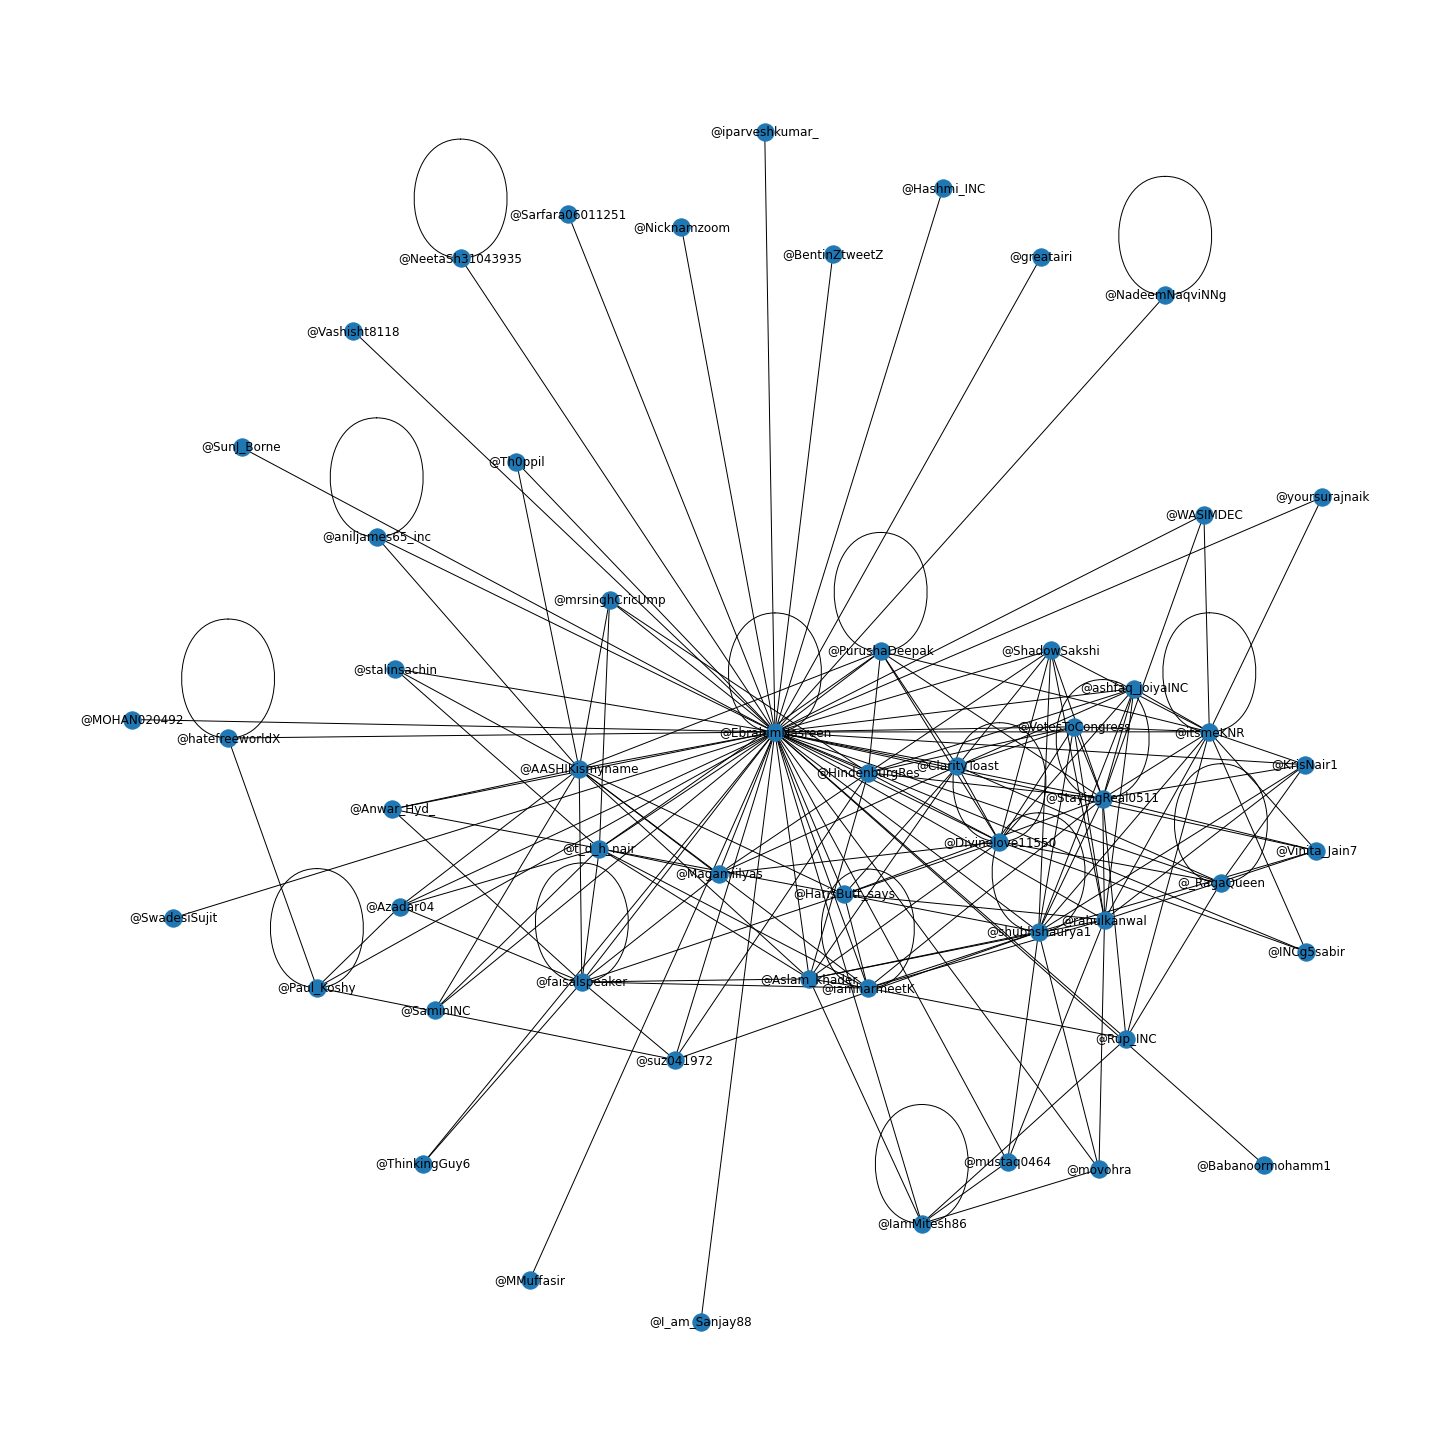

In [45]:
# Get @RajivRanjanRa16 Neighbors
neighbors = list(G.neighbors('@EbrahimNasreen'))
neighbors.append('@EbrahimNasreen')

# Generate SubNetwork
G_Ebrahim = G.subgraph(neighbors) 
plt.figure(figsize=(20,20))
nx.draw(G_Ebrahim, with_labels=True, pos=nx.spring_layout(G_Ebrahim))
plt.show()

# k-Core

In [46]:
# Source: https://github.com/chibuta/k-core-subgraph/blob/master/k_core_subgraph.py

k_cores = {}          #dictionary to hold users and the highest k-core they belong to
highest_kcore =0    #keep track of the hightest recored k-core

G_no_selfloops = G.copy()
G_no_selfloops.remove_edges_from(nx.selfloop_edges(G_no_selfloops))

user_cores = nx.core_number(G_no_selfloops)      #get max k-cores from the network for each user

#group users based on the highest k-core in the network where each user belong
for user, k_core in user_cores.items():

    if highest_kcore < k_core: #keep track of the highest k-core
        highest_kcore = k_core

    #group the users in a dictionary based on highest k_core they belong to
    if k_core in k_cores:
        k_cores[k_core].append(user)
    else:
        k_cores[k_core]=[user]

#print highest k-core from the graph and return the users in that graph
print("The highest k-core is a {0}-core and there are {1} users in that {0}-core. \n"
      "The users are: {2}".format(highest_kcore,len(k_cores[highest_kcore]),k_cores[highest_kcore]))

The highest k-core is a 12-core and there are 49 users in that 12-core. 
The users are: ['@sanjeevchadha8', '@yvs_raizada', '@Shankar27273', '@i_m_sumit_verma', '@waghela_vasant', '@Avi2367', '@cgalgale', '@rsprasad', '@narendramodi', '@brijeshchaodhry', '@jigu10', '@bhoot_bangla', '@hiya_pihu', '@RT1GRP', '@rajesharmahisar', '@DS__Rajput', '@SurgicalWay', '@DrShefali_Says', '@aman__vinay', '@anandkalra69', '@ajaykum91058362', '@AAOLion', '@Sitaram83353328', '@Tripathi5959', '@ProudIndianHu', '@gaurish85Bjp', '@12UnicornBae', '@raajput84915319', '@Revadival', '@asishmaana', '@iParidhiSingh_', '@____SAGAR', '@ChowkidarSharm1', '@ParthThackerBJP', '@ek_tarkeeb', '@Rohit57911', '@sudhirshiv567', '@kumar10888', '@rrakesh_pandey', '@RagiSangit', '@sanatanivivek', '@CvmReporter', '@AmitShah', '@himaninaithani', '@CharuPragya', '@Awadheshkum', '@JPNadda', '@Virend_Sachdeva', '@HarishKhuranna']


## Subplots for k-Core

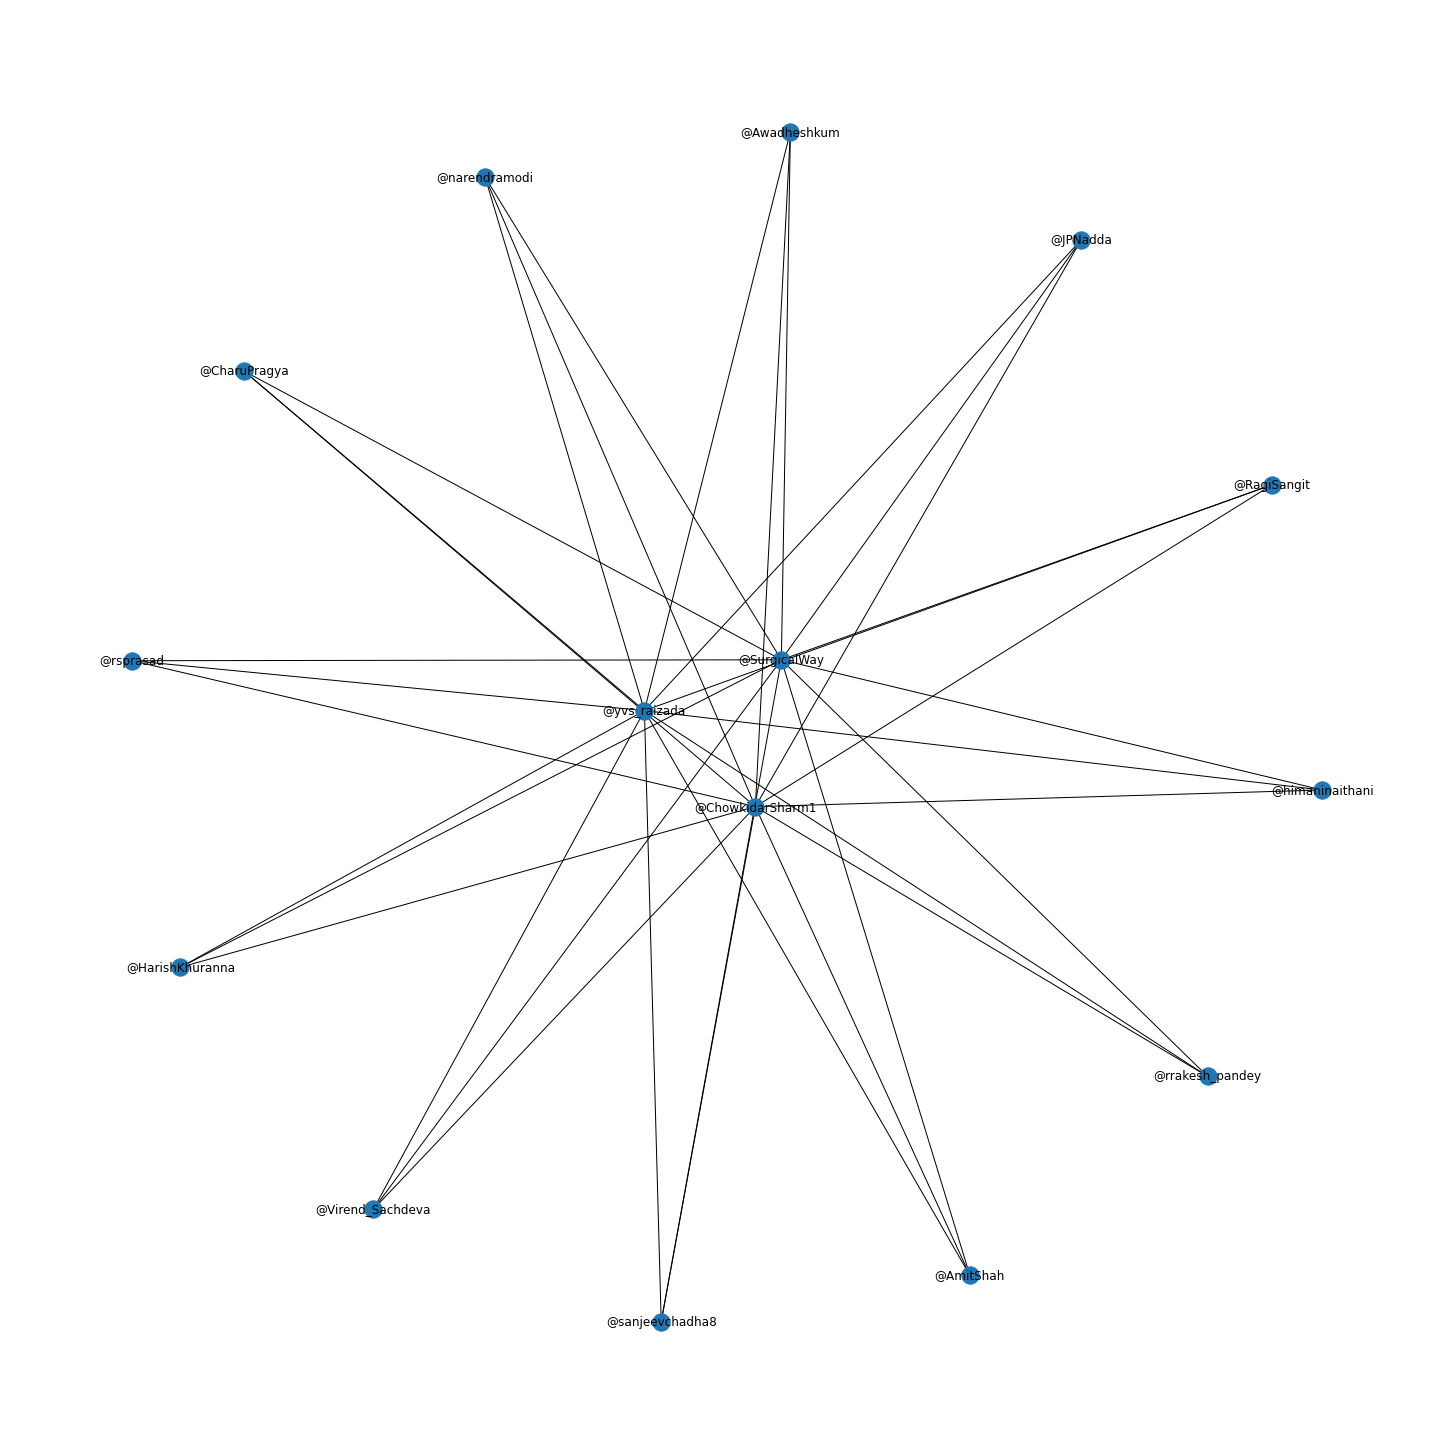

In [47]:
# Remove Nodes Outside of the K-Core
remove = [node for node,degree in dict(G_no_selfloops.degree()).items() if degree <= 12]
G_no_selfloops.remove_nodes_from(remove)

# Generate SubNetwork
G_k_core = G_no_selfloops.subgraph(k_cores[highest_kcore]) 
plt.figure(figsize=(20,20))
nx.draw(G_k_core, with_labels=True, pos=nx.spring_layout(G_k_core))
plt.show()